In [1]:
# 1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import joblib

In [2]:
# 2. Load Dataset
df = pd.read_csv("weatherHistory.csv")

# Gunakan kolom suhu (Temperature (C))
data = df[['Temperature (C)']].values

In [3]:
# 3. Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [4]:
# 4. Membuat Windowing (60 data → 1 prediksi)
X, y = [], []
time_step = 60
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i - time_step:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [5]:
# 5. Split Data Train dan Test (80:20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [6]:
# 6. Bangun Model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ZENBOOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 7. Latih Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - loss: 0.0043 - val_loss: 7.6567e-04
Epoch 2/5
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - loss: 0.0014 - val_loss: 4.5184e-04
Epoch 3/5
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - loss: 8.2185e-04 - val_loss: 4.0912e-04
Epoch 4/5
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - loss: 7.3230e-04 - val_loss: 3.6754e-04
Epoch 5/5
2410/2410 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - loss: 7.4100e-04 - val_loss: 3.4677e-04


In [9]:
# 8. Prediksi Data Uji
y_pred_scaled = model.predict(X_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


In [10]:
# 9. Inverse Transform ke Skala Asli
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

In [11]:
# 10. Evaluasi Model
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

Root Mean Squared Error (RMSE): 1.149
Mean Absolute Error (MAE): 0.779


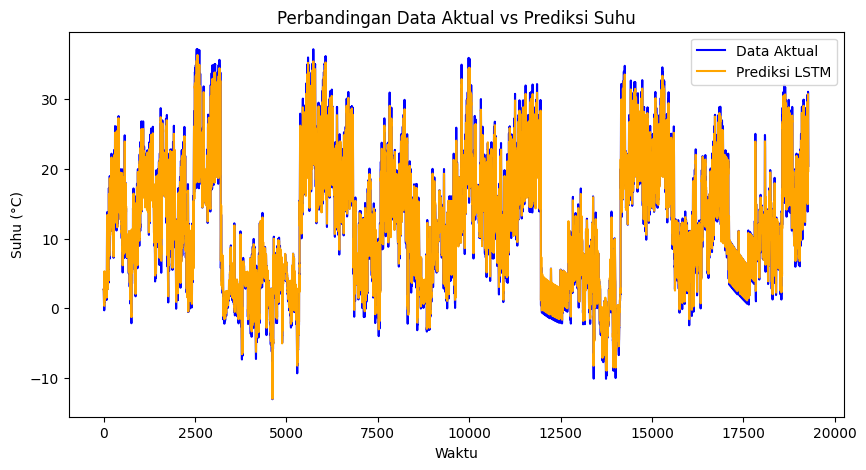

In [12]:
# 11. Visualisasi Hasil
plt.figure(figsize=(10,5))
plt.plot(y_true, label='Data Aktual', color='blue')
plt.plot(y_pred, label='Prediksi LSTM', color='orange')
plt.title('Perbandingan Data Aktual vs Prediksi Suhu')
plt.xlabel('Waktu')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.show()

In [13]:
# 12. Simpan Model dan Scaler
model.save("model_lstm_suhu.h5")
joblib.dump(scaler, "scaler_suhu.pkl")

print("Model dan Scaler berhasil disimpan.")

Model dan Scaler berhasil disimpan.
